In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np


%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#sns.set_style('white')
sns.set_context('talk')#, font_scale=1.5)
import matplotlib as mpl
mpl.rcParams.update({'text.usetex': False})
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
svh = pd.read_csv('../results/benchmark/ResultBenchSVH_MaxSize6_Nint20.csv',header=None)
svs = pd.read_csv('../results/benchmark/ResultBenchSVS_MaxSize6_Nint20.csv',header=None)
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

/tmp/ipykernel_21985/2882228682.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_svh = cm.get_cmap('Set2')(0)
/tmp/ipykernel_21985/2882228682.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_svs = cm.get_cmap('Set2')(1)


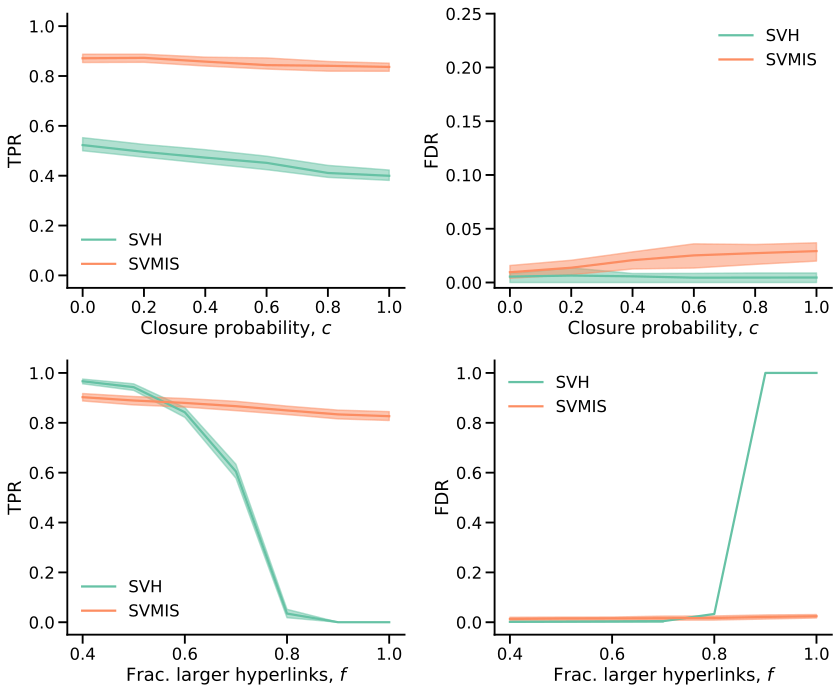

In [25]:
svh = pd.read_csv('../results/benchmark//ResultBenchSVH_MaxSize6_Nint20.csv',header=None)
svs = pd.read_csv('../results/benchmark//ResultBenchSVS_MaxSize6_Nint20.csv',header=None)
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

# get the first two colors from the Set2 colormap
color_svh = cm.get_cmap('Set2')(0)
color_svs = cm.get_cmap('Set2')(1)

N = 200
d = 0.005

fig,axes = plt.subplots(2,2,figsize=(12,10))
axes = axes.flatten()

ax = axes[0]

svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure', ax=ax, color=color_svh)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax, color=color_svs)

#svn1 = svn.query('N==@N & d==@d').groupby('closure')['svn'].apply(lambda x: np.mean(x)-np.std(x)/np.sqrt(len(x)))
#svn2 = svn.query('N==@N & d==@d').groupby('closure')['svn'].apply(lambda x: np.mean(x)+np.std(x)/np.sqrt(len(x)))

svh1 = svh.query('N==@N & d==@d').groupby('closure')['svh'].apply(lambda x: np.percentile(x,20))
svh2 = svh.query('N==@N & d==@d').groupby('closure')['svh'].apply(lambda x: np.percentile(x,80))

svs1 = svs.query('N==@N & d==@d').groupby('closure')['svs'].apply(lambda x: np.percentile(x,20))
svs2 = svs.query('N==@N & d==@d').groupby('closure')['svs'].apply(lambda x: np.percentile(x,80))

ax.fill_between(x=svh.closure.unique(),y1=svh1,y2=svh2,alpha=.5, color=color_svh)
ax.fill_between(x=svh.closure.unique(),y1=svs1,y2=svs2,alpha=.5, color=color_svs)


sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.set_xlabel('Closure probability, $c$')
ax.legend(frameon=False)

ax = axes[1]

svh.columns = ['N','d','closure','a','svh','jaccard']
svs.columns = ['N','d','closure','a','svs','jaccard']

svh.query('N==@N & d==@d').groupby('closure')['svh'].mean().reset_index().plot(x='closure',ax=ax, color=color_svh)
svs.query('N==@N & d==@d').groupby('closure')['svs'].mean().reset_index().plot(x='closure',ax=ax, color=color_svs)


svh1 = svh.query('N==@N & d==@d').groupby('closure')['svh'].apply(lambda x: np.percentile(x,20))
svh2 = svh.query('N==@N & d==@d').groupby('closure')['svh'].apply(lambda x: np.percentile(x,80))

svs1 = svs.query('N==@N & d==@d').groupby('closure')['svs'].apply(lambda x: np.percentile(x,20))
svs2 = svs.query('N==@N & d==@d').groupby('closure')['svs'].apply(lambda x: np.percentile(x,80))

ax.fill_between(x=svh.closure.unique(),y1=svh1,y2=svh2,alpha=.5, color=color_svh)
ax.fill_between(x=svh.closure.unique(),y1=svs1,y2=svs2,alpha=.5, color=color_svs)

sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.set_xlabel('Closure probability, $c$')
ax.legend(frameon=False)

svh = pd.read_csv('../results/benchmark//ResultBenchSVH_MaxSize6_Nint20_LS_2.csv',header=None)
svs = pd.read_csv('../results/benchmark//ResultBenchSVS_MaxSize6_Nint20_LS_2.csv',header=None)
svh.columns = ['N','d','closure','f','svh','fdr','jaccard']
svs.columns = ['N','d','closure','f','svs','fdr','jaccard']

N = 200
d = 0.005
c = 0.2

#fig,axes = plt.subplots(1,2,figsize=(12,5))
#axes = axes.flatten()

ax = axes[2]

svh.columns = ['N','d','closure','f','svh','fdr','jaccard']
svs.columns = ['N','d','closure','f','svs','fdr','jaccard']

svh.query('N==@N & d==@d & closure==@c').groupby('f')['svh'].mean().reset_index().plot(x='f',ax=ax, color=color_svh)
svs.query('N==@N & d==@ d& closure==@c').groupby('f')['svs'].mean().reset_index().plot(x='f',ax=ax, color=color_svs)


svh1 = svh.query('N==@N & d==@d & closure==@c').groupby('f')['svh'].apply(lambda x: np.percentile(x,20))
svh2 = svh.query('N==@N & d==@d & closure==@c').groupby('f')['svh'].apply(lambda x: np.percentile(x,80))

svs1 = svs.query('N==@N & d==@d & closure==@c').groupby('f')['svs'].apply(lambda x: np.percentile(x,20))
svs2 = svs.query('N==@N & d==@d & closure==@c').groupby('f')['svs'].apply(lambda x: np.percentile(x,80))

ax.fill_between(x=svh.f.unique(),y1=svh1,y2=svh2,alpha=.5, color=color_svh)
ax.fill_between(x=svh.f.unique(),y1=svs1,y2=svs2,alpha=.5, color=color_svs)

sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.set_xlabel('Frac. larger hyperlinks, $f$')
ax.legend(frameon=False)

ax = axes[3]

svh.columns = ['N','d','closure','f','a','svh','jaccard']
svs.columns = ['N','d','closure','f','a','svs','jaccard']

svh.query('N==@N & d==@d & closure==@c').groupby('f')['svh'].mean().reset_index().plot(x='f',ax=ax, color=color_svh)
svs.query('N==@N & d==@d & closure==@c').groupby('f')['svs'].mean().reset_index().plot(x='f',ax=ax, color=color_svs)


svh1 = svh.query('N==@N & d==@d & closure==@c').groupby('f')['svh'].apply(lambda x: np.percentile(x,20))
svh2 = svh.query('N==@N & d==@d & closure==@c').groupby('f')['svh'].apply(lambda x: np.percentile(x,80))

svs1 = svs.query('N==@N & d==@d & closure==@c').groupby('f')['svs'].apply(lambda x: np.percentile(x,20))
svs2 = svs.query('N==@N & d==@d & closure==@c').groupby('f')['svs'].apply(lambda x: np.percentile(x,80))

ax.fill_between(x=svh.f.unique(),y1=svh1,y2=svh2,alpha=.5, color=color_svh)
ax.fill_between(x=svh.f.unique(),y1=svs1,y2=svs2,alpha=.5, color=color_svs)

sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.set_xlabel('Frac. larger hyperlinks, $f$')
ax.legend(frameon=False)

for i, ax in enumerate(axes):

    if i != 1:
        ax.set_ylim(-0.05,1.05)
    else:
        ax.set_ylim(-0.005,0.25)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['SVH','SVMIS'], frameon=False)

    ylabel = ax.get_ylabel()
    ax.set_ylabel(ylabel.upper())


plt.tight_layout()

fig_file = '../paper/figures/Benchmark.svg'
if os.path.exists(fig_file):
    print("Figure already exists..")
else:
    plt.savefig('../paper/figures/Benchmark.pdf',dpi=200)

In [10]:
svh1

f
0.4    0.956522
0.5    0.930033
0.6    0.821818
0.7    0.577763
0.8    0.018103
0.9    0.000000
1.0    0.000000
Name: svh, dtype: float64

In [44]:
svn.query('N==@N & d==@d & closure==0').groupby('f')['svn'].count()

f
0.4    100
0.5    100
0.6    100
0.7    100
0.8    100
0.9    100
1.0    100
Name: svn, dtype: int64

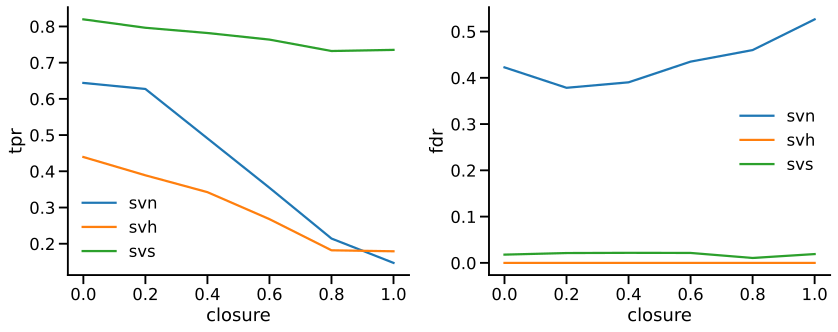

In [11]:
N = 100
d = 0.005

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','a','svn','jaccard']
svh.columns = ['N','d','closure','a','svh','jaccard']
svs.columns = ['N','d','closure','a','svs','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

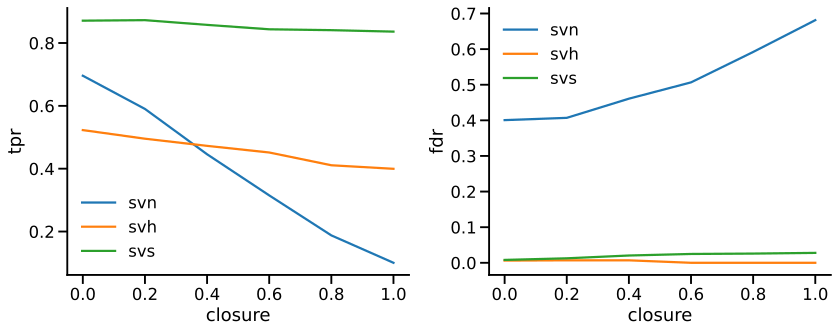

In [12]:
N = 200
d = 0.005

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','a','svn','jaccard']
svh.columns = ['N','d','closure','a','svh','jaccard']
svs.columns = ['N','d','closure','a','svs','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

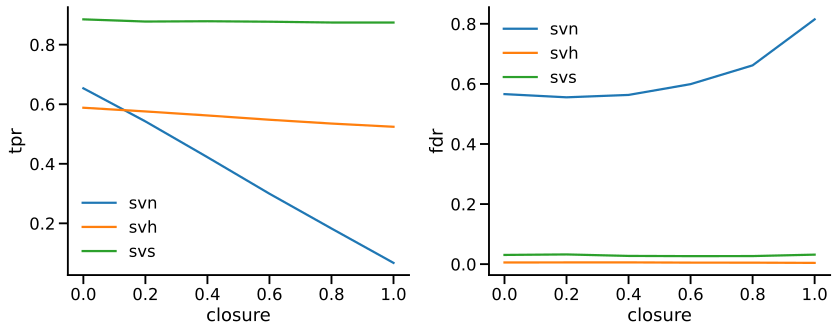

In [60]:
N = 500
d = 0.005

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','a','svn','jaccard']
svh.columns = ['N','d','closure','a','svh','jaccard']
svs.columns = ['N','d','closure','a','svs','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

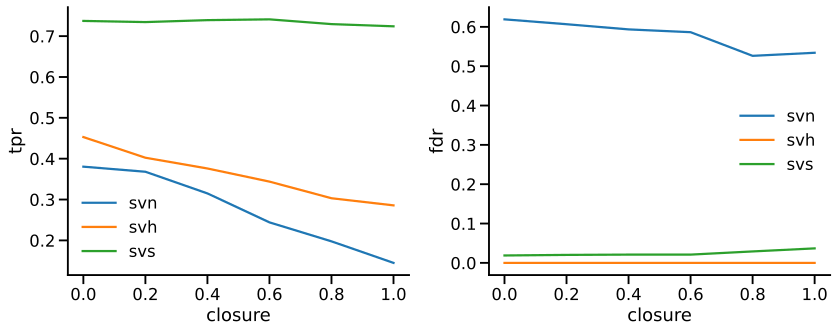

In [61]:
N = 100
d = 0.01

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','a','svn','jaccard']
svh.columns = ['N','d','closure','a','svh','jaccard']
svs.columns = ['N','d','closure','a','svs','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

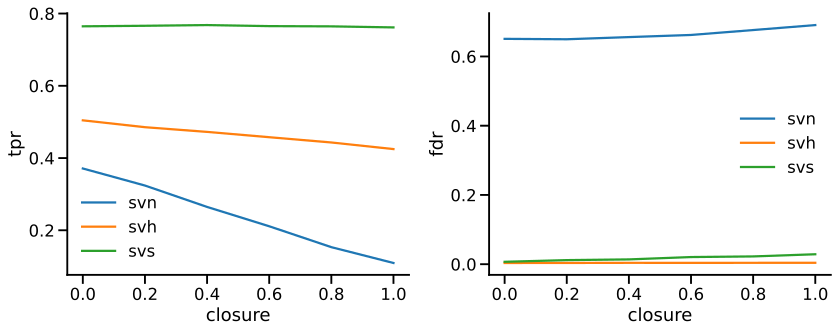

In [62]:
N = 200
d = 0.01

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','a','svn','jaccard']
svh.columns = ['N','d','closure','a','svh','jaccard']
svs.columns = ['N','d','closure','a','svs','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

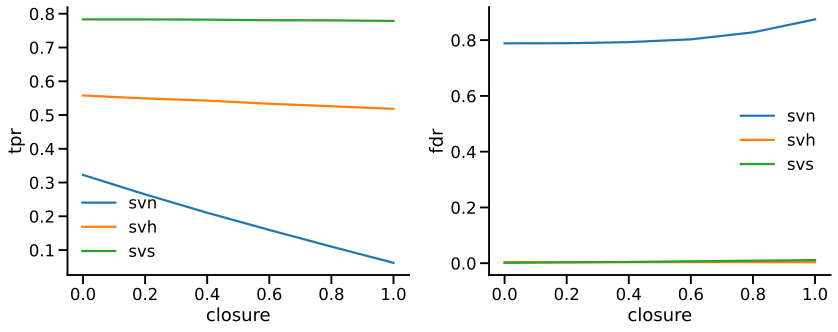

In [63]:
N = 500
d = 0.01

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','a','svn','jaccard']
svh.columns = ['N','d','closure','a','svh','jaccard']
svs.columns = ['N','d','closure','a','svs','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

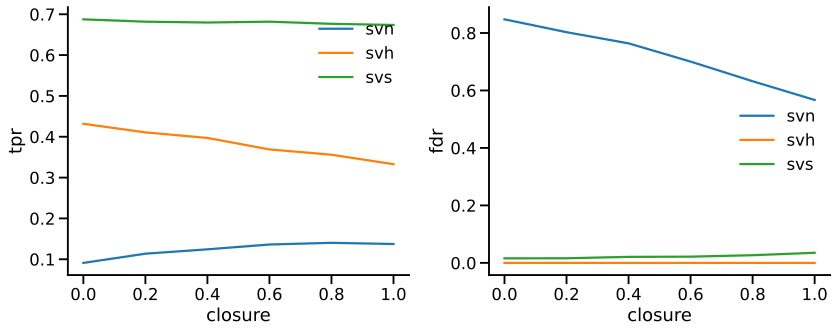

In [64]:
N = 100
d = 0.02

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','a','svn','jaccard']
svh.columns = ['N','d','closure','a','svh','jaccard']
svs.columns = ['N','d','closure','a','svs','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

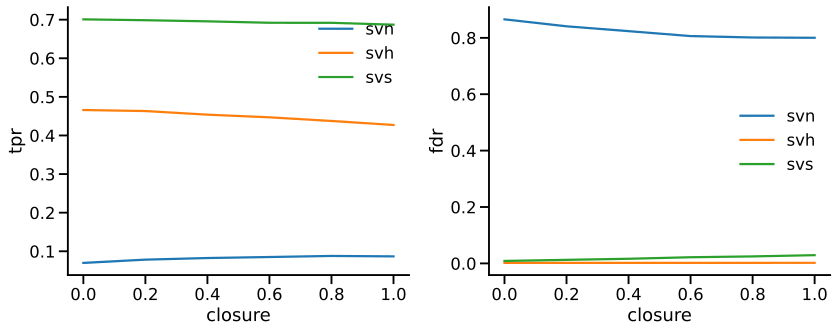

In [65]:
N = 200
d = 0.02

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','a','svn','jaccard']
svh.columns = ['N','d','closure','a','svh','jaccard']
svs.columns = ['N','d','closure','a','svs','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

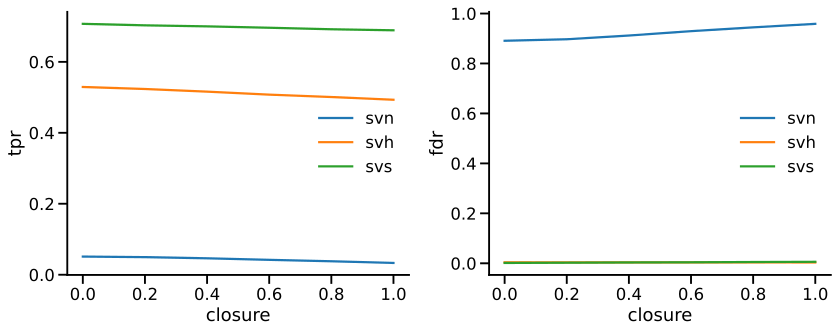

In [66]:
svn = pd.read_csv('results/ResultBenchSVN_MaxSize6_Nint20.csv',header=None)
svh = pd.read_csv('results/ResultBenchSVH_MaxSize6_Nint20.csv',header=None)
svs = pd.read_csv('results/ResultBenchSVS_MaxSize6_Nint20.csv',header=None)
svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

N = 500
d = 0.02

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','a','svn','jaccard']
svh.columns = ['N','d','closure','a','svh','jaccard']
svs.columns = ['N','d','closure','a','svs','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

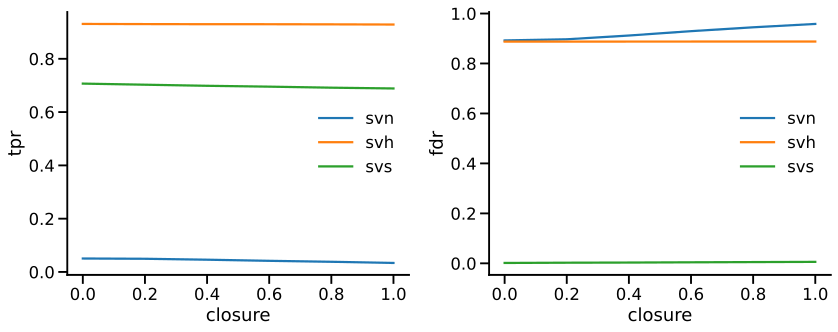

In [56]:
svn = pd.read_csv('results/ResultBenchSVN_MaxSize6_Nint20_2.csv',header=None)
svh = pd.read_csv('results/ResultBenchSVH_MaxSize6_Nint20_2.csv',header=None)
svs = pd.read_csv('results/ResultBenchSVS_MaxSize6_Nint20_2.csv',header=None)
svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

N = 500
d = 0.02

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','svn','fdr','jaccard']
svh.columns = ['N','d','closure','svh','fdr','jaccard']
svs.columns = ['N','d','closure','svs','fdr','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','a','svn','jaccard']
svh.columns = ['N','d','closure','a','svh','jaccard']
svs.columns = ['N','d','closure','a','svs','jaccard']

svn.query('N==@N & d==@d').groupby('closure')['svn'].median().reset_index().plot(x='closure',ax=ax)
svh.query('N==@N & d==@d').groupby('closure')['svh'].median().reset_index().plot(x='closure',ax=ax)
svs.query('N==@N & d==@d').groupby('closure')['svs'].median().reset_index().plot(x='closure',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

In [ ]:
hyperlinks = pd.read_csv('data/walmart-trips/hyperedges-walmart-trips.txt',sep=';',header=None)
hyperlinks = list(map(lambda x: tuple(map(lambda y: int(y)-1,x.split(','))),hyperlinks[0]))

In [33]:
svn = pd.read_csv('results/ResultBenchSVN_MaxSize6_Nint20_LS_2.csv',header=None)
svh = pd.read_csv('results/ResultBenchSVH_MaxSize6_Nint20_LS_2.csv',header=None)
svs = pd.read_csv('results/ResultBenchSVS_MaxSize6_Nint20_LS_2.csv',header=None)
svn.columns = ['N','d','closure','f','svn','fdr','jaccard']
svh.columns = ['N','d','closure','f','svh','fdr','jaccard']
svs.columns = ['N','d','closure','f','svs','fdr','jaccard']

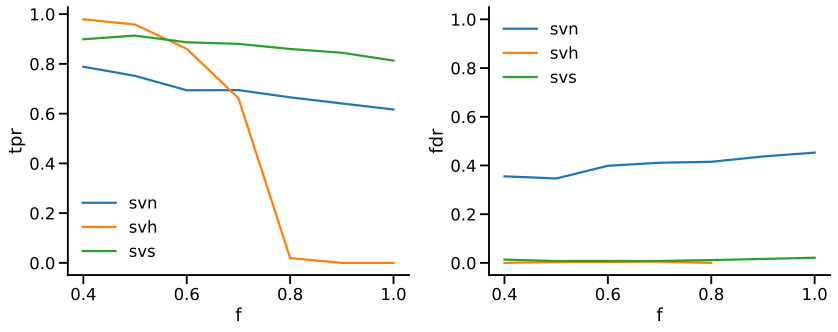

In [27]:
svn = pd.read_csv('results/ResultBenchSVN_MaxSize6_Nint20_LS_2.csv',header=None)
svh = pd.read_csv('results/ResultBenchSVH_MaxSize6_Nint20_LS_2.csv',header=None)
svs = pd.read_csv('results/ResultBenchSVS_MaxSize6_Nint20_LS_2.csv',header=None)
svn.columns = ['N','d','closure','f','svn','fdr','jaccard']
svh.columns = ['N','d','closure','f','svh','fdr','jaccard']
svs.columns = ['N','d','closure','f','svs','fdr','jaccard']

N = 200
d = 0.005
c = 0.

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','f','svn','fdr','jaccard']
svh.columns = ['N','d','closure','f','svh','fdr','jaccard']
svs.columns = ['N','d','closure','f','svs','fdr','jaccard']

svn.query('N==@N & d==@d & closure==@c').groupby('f')['svn'].median().reset_index().plot(x='f',ax=ax)
svh.query('N==@N & d==@d & closure==@c').groupby('f')['svh'].median().reset_index().plot(x='f',ax=ax)
svs.query('N==@N & d==@ d& closure==@c').groupby('f')['svs'].median().reset_index().plot(x='f',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','f','a','svn','jaccard']
svh.columns = ['N','d','closure','f','a','svh','jaccard']
svs.columns = ['N','d','closure','f','a','svs','jaccard']

svn.query('N==@N & d==@d & closure==@c').groupby('f')['svn'].median().reset_index().plot(x='f',ax=ax)
svh.query('N==@N & d==@d & closure==@c').groupby('f')['svh'].median().reset_index().plot(x='f',ax=ax)
svs.query('N==@N & d==@d & closure==@c').groupby('f')['svs'].median().reset_index().plot(x='f',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

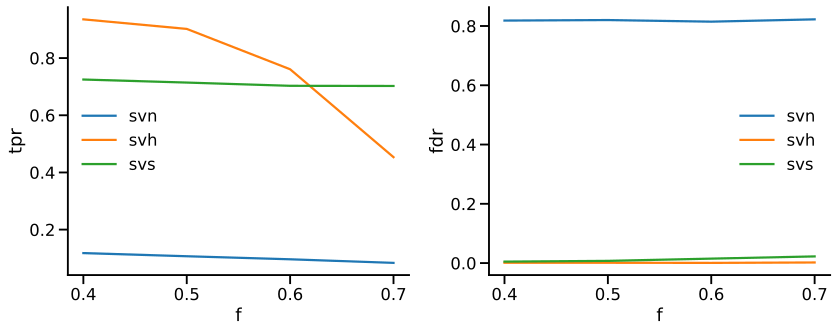

In [36]:
N = 200
d = 0.02
c = 0.4

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.flatten()

ax = axes[0]

svn.columns = ['N','d','closure','f','svn','fdr','jaccard']
svh.columns = ['N','d','closure','f','svh','fdr','jaccard']
svs.columns = ['N','d','closure','f','svs','fdr','jaccard']

svn.query('N==@N & d==@d & closure==@c').groupby('f')['svn'].median().reset_index().plot(x='f',ax=ax)
svh.query('N==@N & d==@d & closure==@c').groupby('f')['svh'].median().reset_index().plot(x='f',ax=ax)
svs.query('N==@N & d==@ d& closure==@c').groupby('f')['svs'].median().reset_index().plot(x='f',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('tpr')
ax.legend(frameon=False)

ax = axes[1]

svn.columns = ['N','d','closure','f','a','svn','jaccard']
svh.columns = ['N','d','closure','f','a','svh','jaccard']
svs.columns = ['N','d','closure','f','a','svs','jaccard']

svn.query('N==@N & d==@d & closure==@c').groupby('f')['svn'].median().reset_index().plot(x='f',ax=ax)
svh.query('N==@N & d==@d & closure==@c').groupby('f')['svh'].median().reset_index().plot(x='f',ax=ax)
svs.query('N==@N & d==@d & closure==@c').groupby('f')['svs'].median().reset_index().plot(x='f',ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('fdr')
ax.legend(frameon=False)

plt.tight_layout()

In [35]:
svn.query('N==@N & d==@d & closure==@c').groupby('f')['svn'].count()

f
0.4    10
0.5    10
0.6    10
0.7    10
0.8    10
0.9    10
1.0    10
Name: svn, dtype: int64